In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/raid/mpsych/OMAMA/GP2/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/raid/mpsych//OMAMA/GP2/GP2TOYEXAMPLE_LARGE/masks.npy')

In [3]:
X_test = images[8000:10000]
y_test = masks[8000:10000]

In [4]:
images = images[:8000]
masks = masks[:8000]

In [5]:
images.shape

(8000, 512, 512, 1)

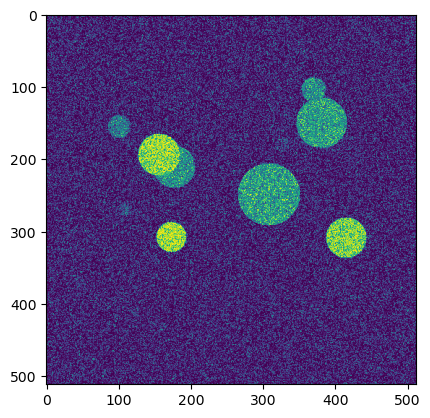

In [6]:
imshow(images[100])

In [7]:
masks.shape

(8000, 512, 512, 1)

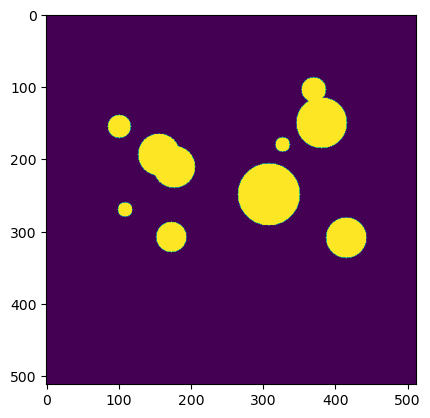

In [8]:
imshow(masks[100])

In [9]:
import sys
sys.path.append('../')
import gp2

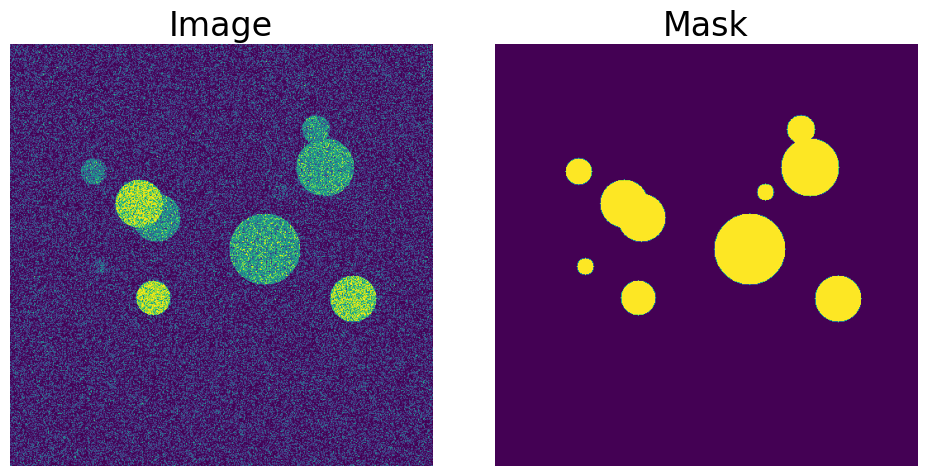

In [10]:
plt.rcParams['font.size'] = 20
gp2.Util.display_image_and_mask(images[100], masks[100])

In [10]:
from keras import losses

In [11]:
loss_fx = losses.BCE

In [12]:
C = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpk6huw599kuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpg66o2nxykuc_unet2d


In [13]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpg66o2nxykuc_unet2d
Verbose mode active!


In [14]:
R.classifier = C ### use custom classifier

In [15]:
R.run(images, masks, runs=5, batch_size=16, shuffle=True, results_file='/raid/mpsych/OMAMA/GP2/results/kuc_unet2d_0kuc_unet2d_model_1_5_Example1.pkl')

Shuffling data...
Weights OK!
******
Loop 1
Epoch 1/100
25/25 [==============================] - 29s 728ms/step - loss: 0.0558 - dice_coeff: 0.8782 - val_loss: 0.0468 - val_dice_coeff: 0.8782
Epoch 2/100
25/25 [==============================] - 17s 680ms/step - loss: 0.0447 - dice_coeff: 0.8941 - val_loss: 0.0429 - val_dice_coeff: 0.8930
Epoch 3/100
25/25 [==============================] - 17s 681ms/step - loss: 0.0440 - dice_coeff: 0.8955 - val_loss: 0.0447 - val_dice_coeff: 0.8741
Epoch 4/100
25/25 [==============================] - 17s 682ms/step - loss: 0.0441 - dice_coeff: 0.8965 - val_loss: 0.0427 - val_dice_coeff: 0.9070
Epoch 5/100
25/25 [==============================] - 17s 680ms/step - loss: 0.0422 - dice_coeff: 0.8993 - val_loss: 0.0431 - val_dice_coeff: 0.8800
Epoch 6/100
25/25 [==============================] - 17s 682ms/step - loss: 0.0432 - dice_coeff: 0.8969 - val_loss: 0.0417 - val_dice_coeff: 0.8922
Epoch 7/100
25/25 [==============================] - 17s 681ms/step 

In [16]:
R.classifier_scores

[[0.04226686805486679, 0.8884738087654114],
 [0.04075149819254875, 0.9057601690292358],
 [0.04076067730784416, 0.8903335332870483],
 [0.04098143428564072, 0.8865149021148682],
 [0.04077737033367157, 0.9096711277961731]]

In [17]:
R.discriminator_scores

[[1.1973034143447876, 0.8770833611488342],
 [0.748009443283081, 0.9083333611488342],
 [0.9229289293289185, 0.9083333611488342],
 [0.8066225647926331, 0.9104166626930237],
 [1.0045312643051147, 0.8791666626930237]]

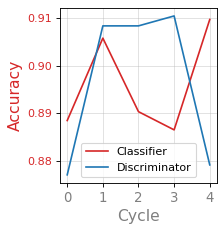

In [18]:
R.plot()

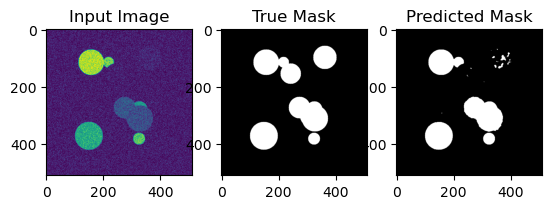

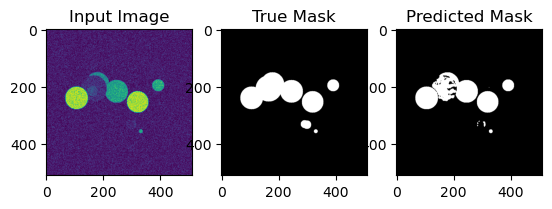

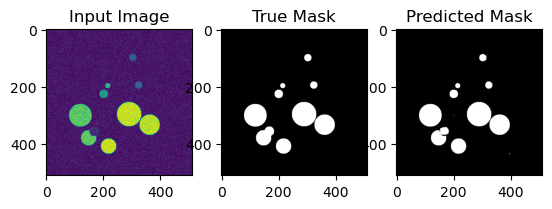

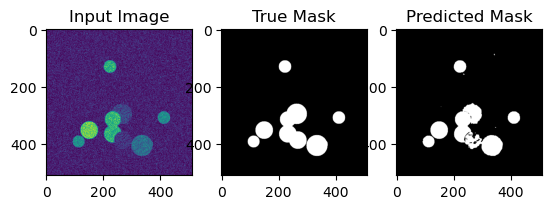

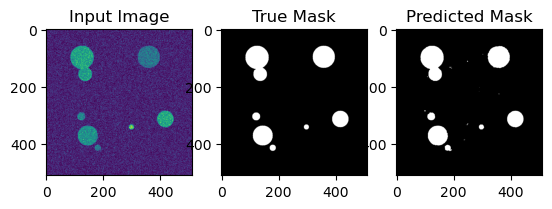

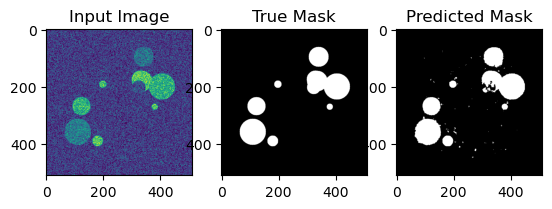

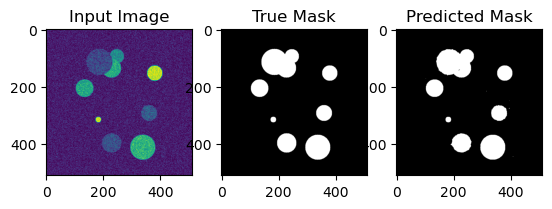

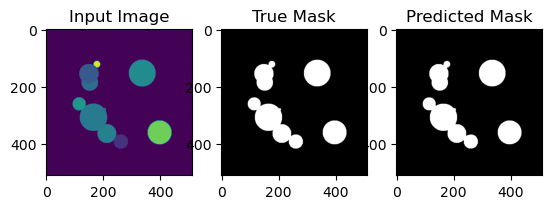

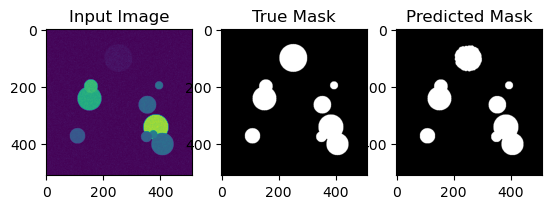

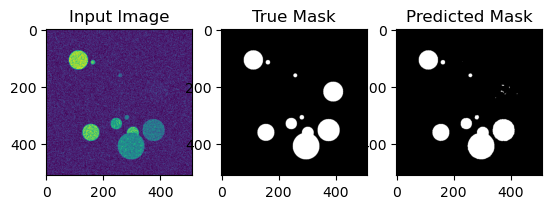

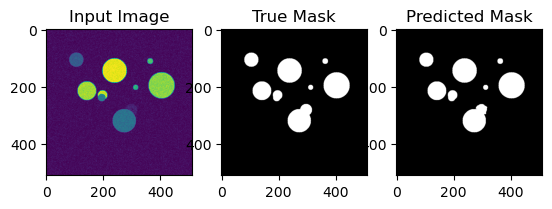

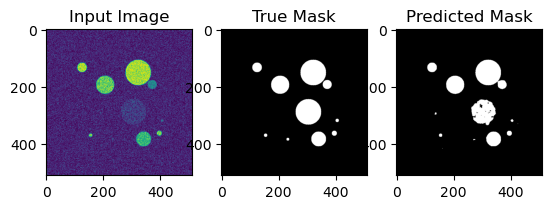

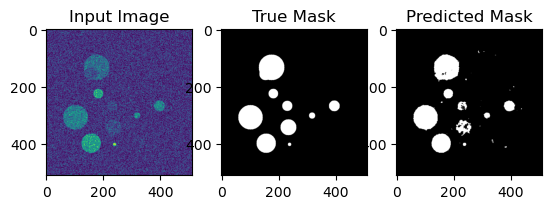

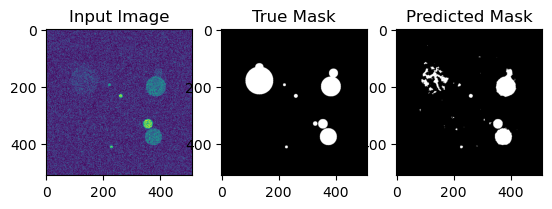

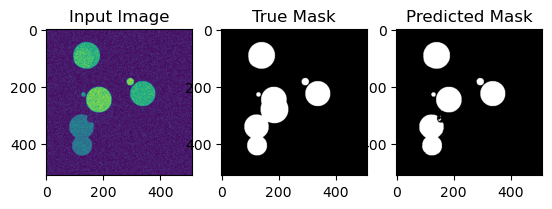

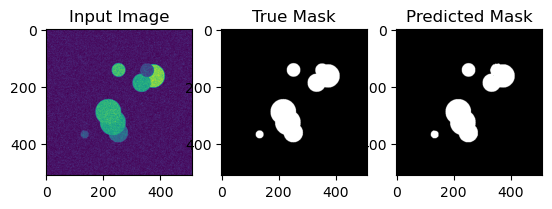

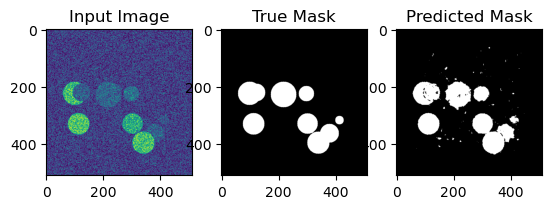

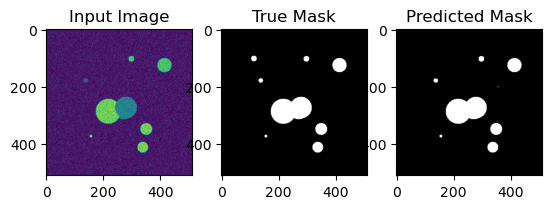

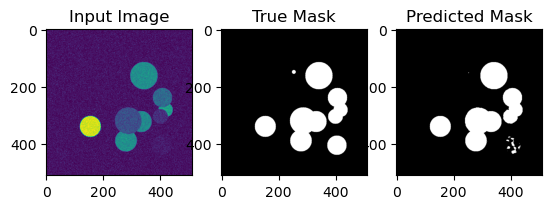

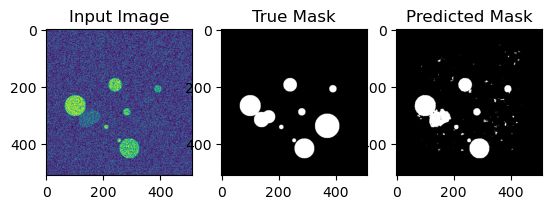

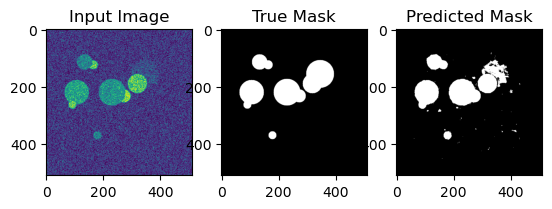

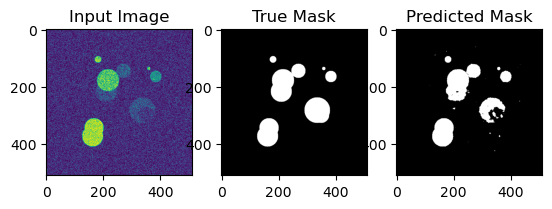

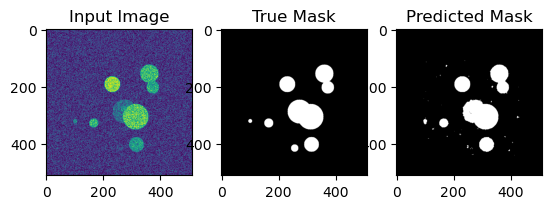

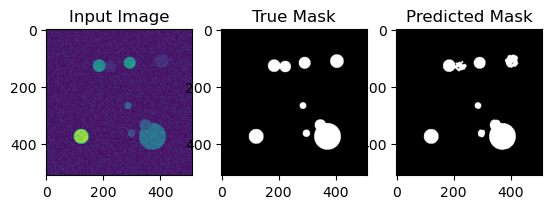

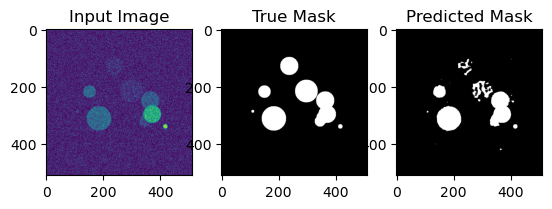

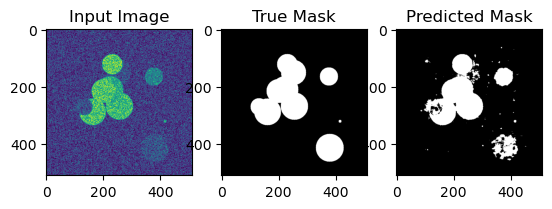

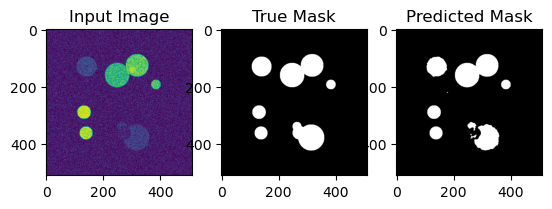

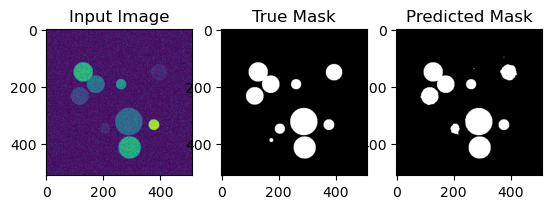

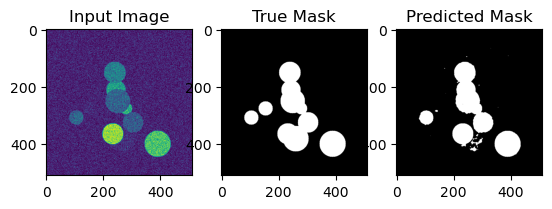

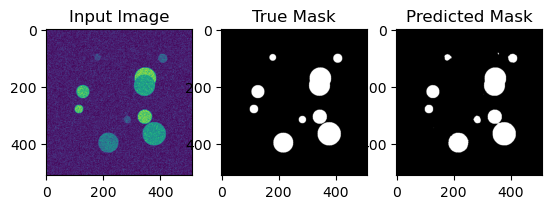

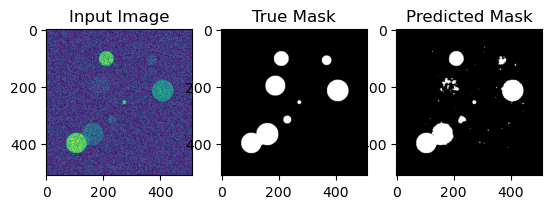

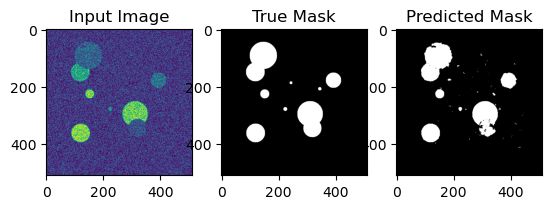

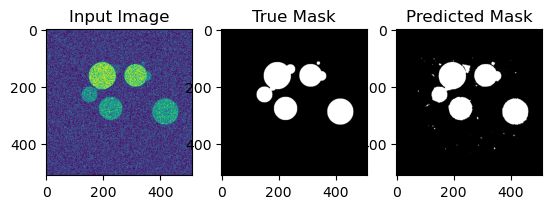

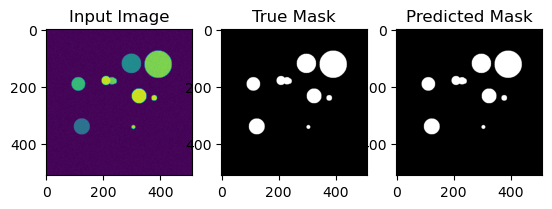

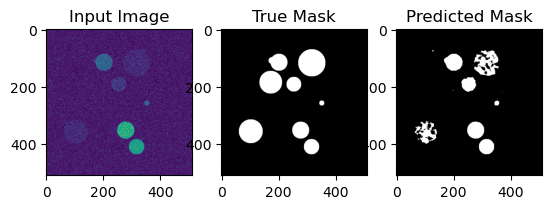

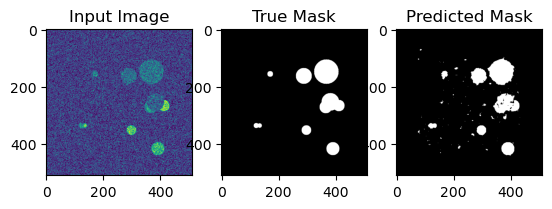

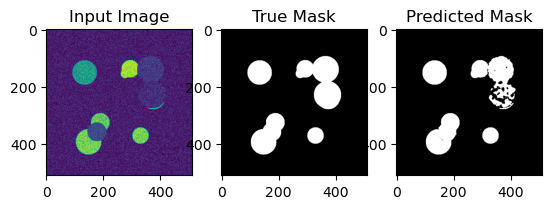

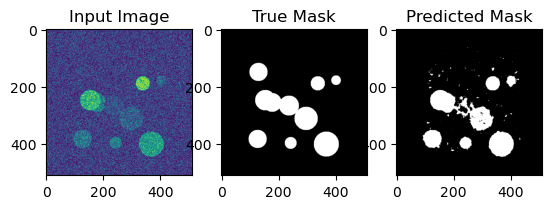

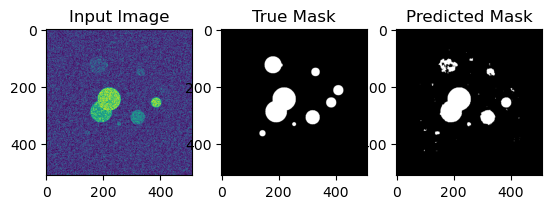

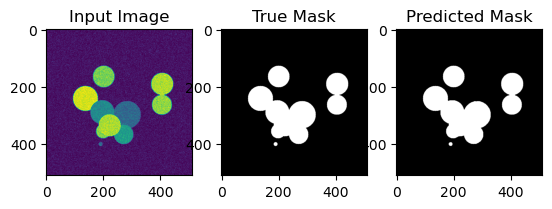

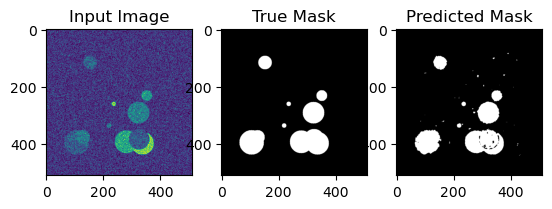

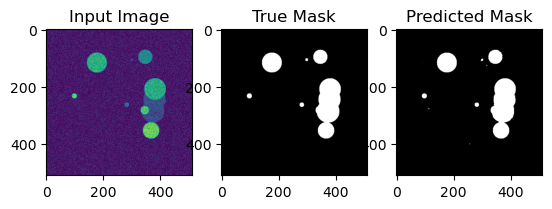

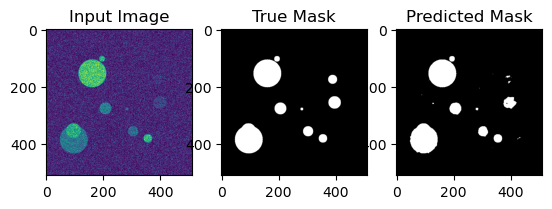

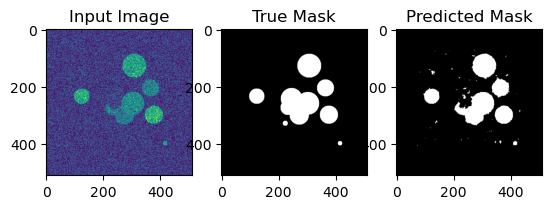

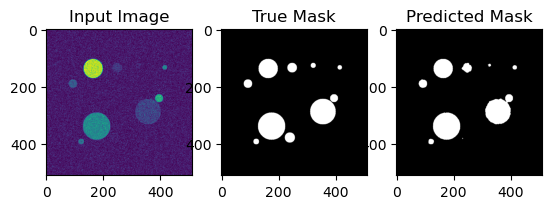

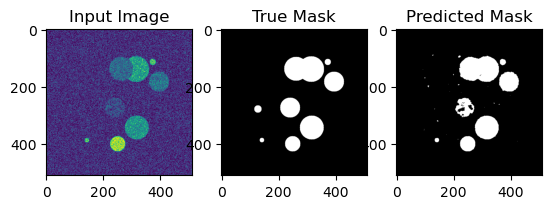

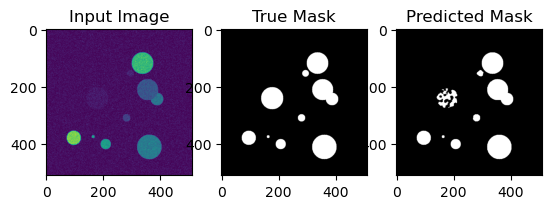

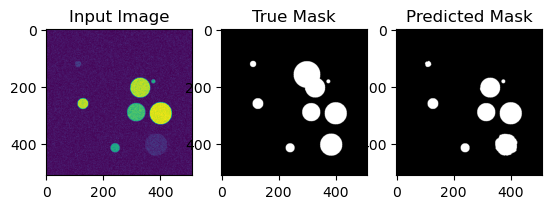

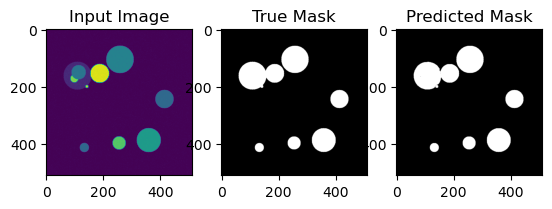

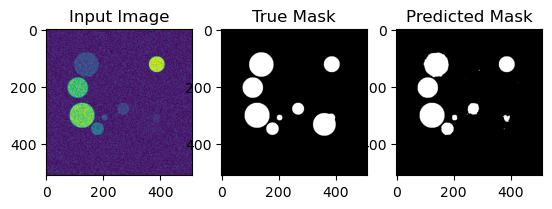

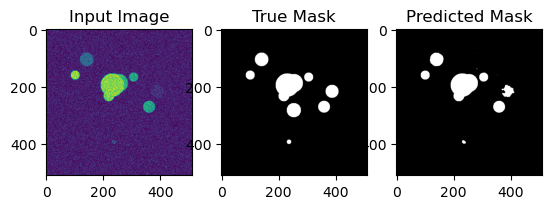

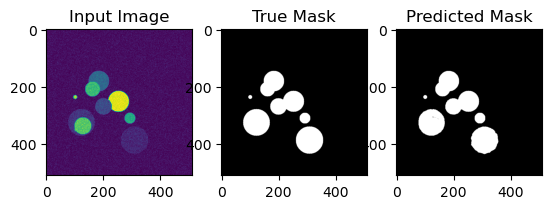

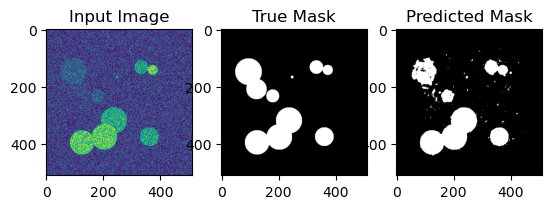

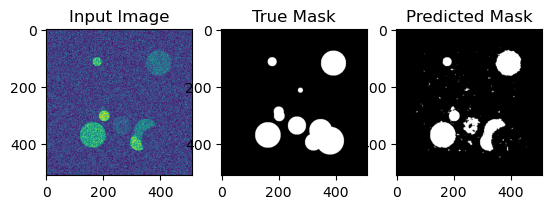

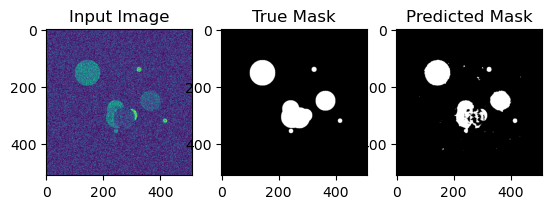

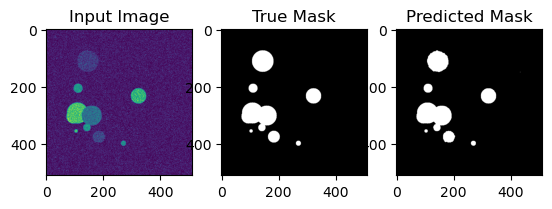

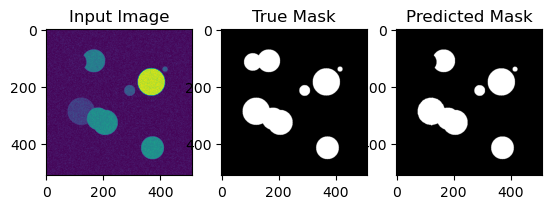

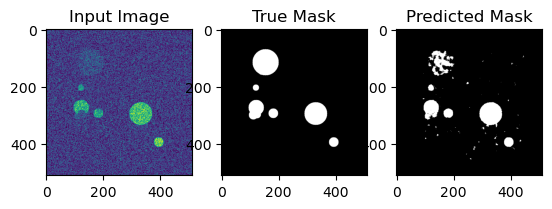

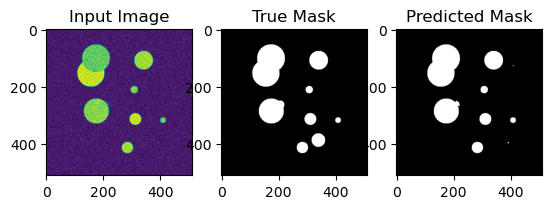

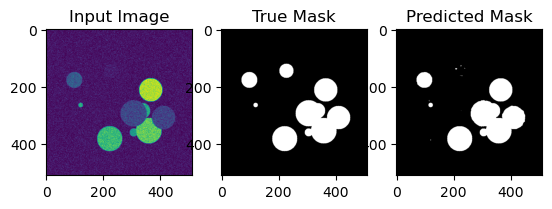

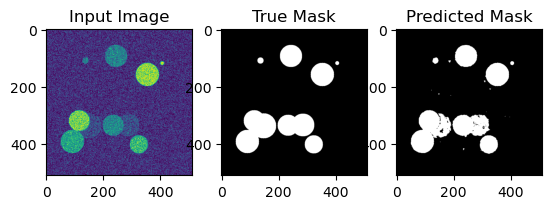

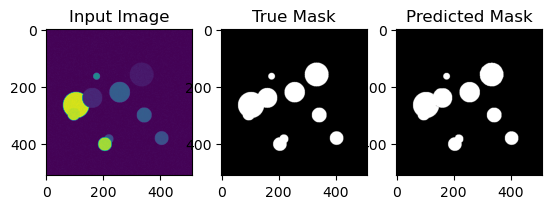

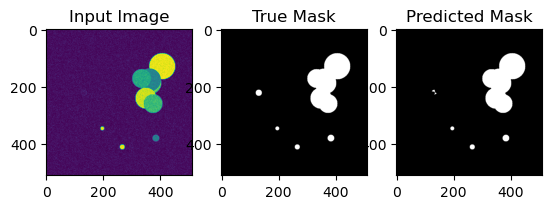

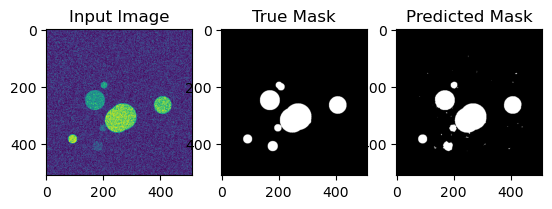

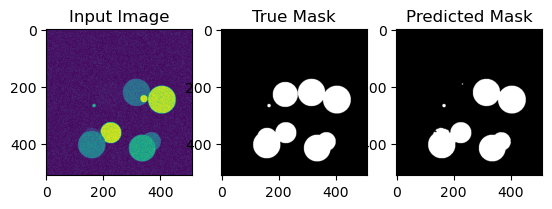

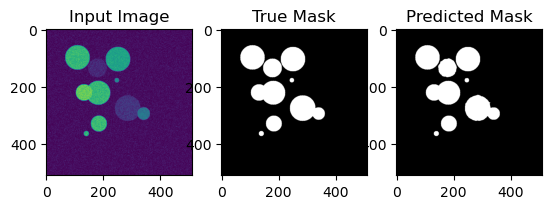

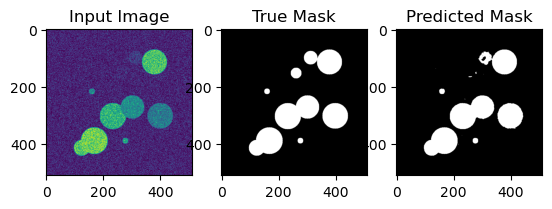

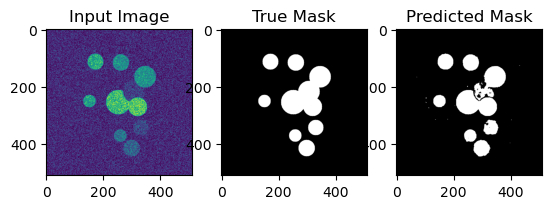

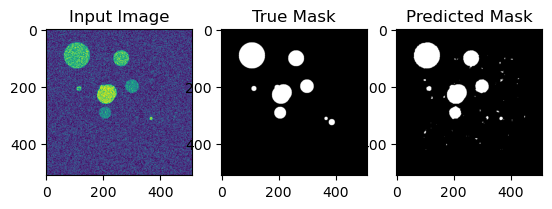

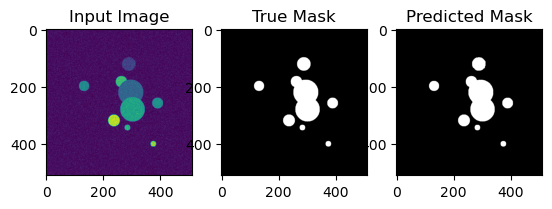

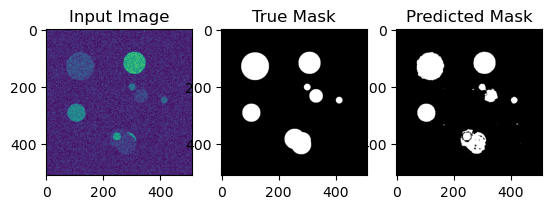

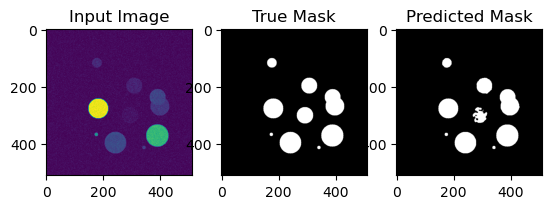

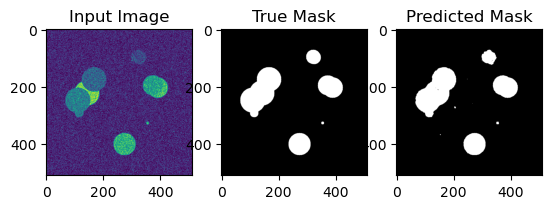

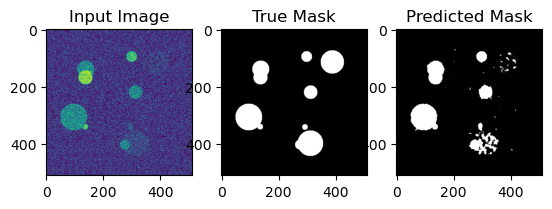

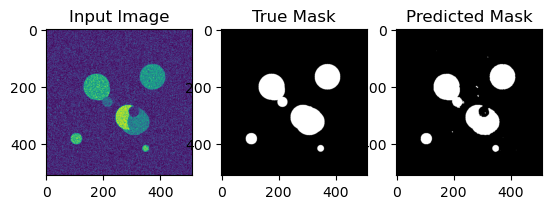

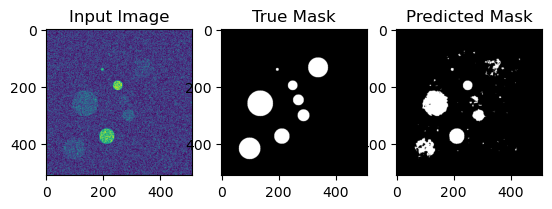

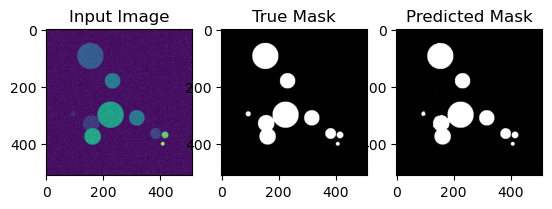

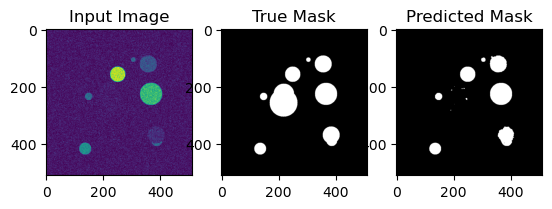

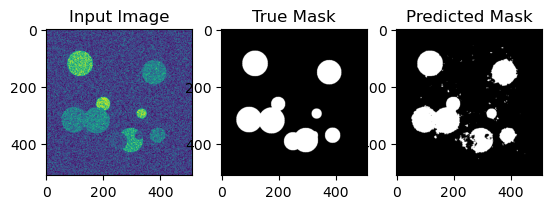

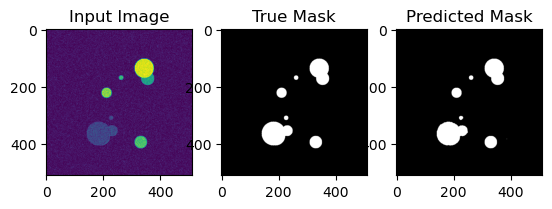

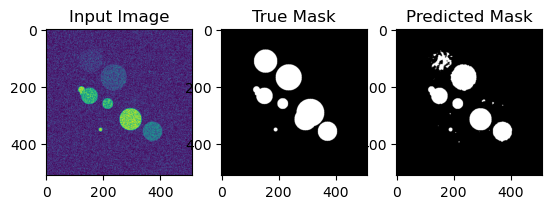

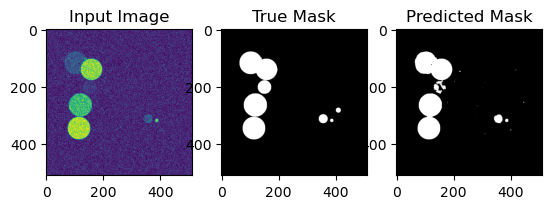

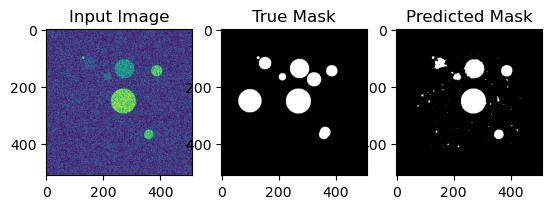

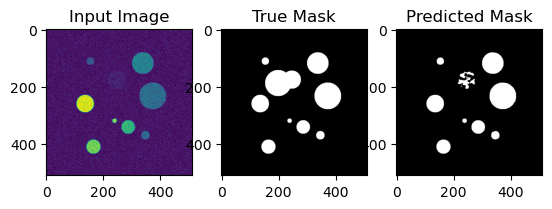

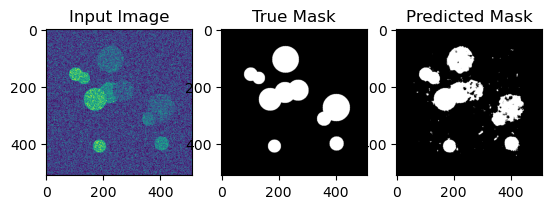

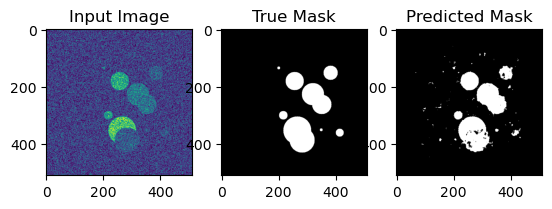

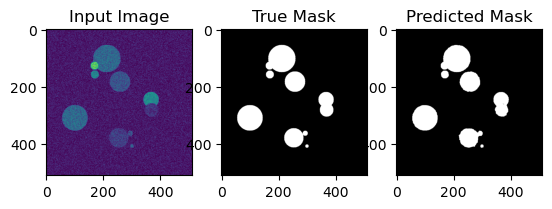

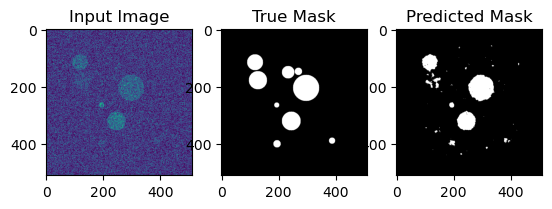

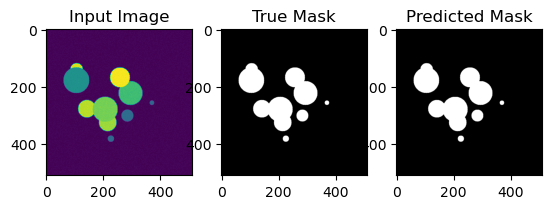

In [19]:
gp2.Util.visualize_predictions(C, X_test, y_test, num_samples=100)

In [20]:
y_pred = R.classifier.predict(X_test, y_test)

In [21]:
y_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [22]:
BareBone = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpk6huw599kuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpg66o2nxykuc_unet2d


In [23]:
barebone_pred = BareBone.predict(X_test, y_test)

In [24]:
barebone_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [25]:
R.classifier.model.metrics_names

['loss', 'dice_coeff']

In [26]:
BareBone.model.metrics_names

['loss', 'dice_coeff']